In [37]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv(r'C:\Users\aimbe\Downloads\3_user_data.csv')

In [4]:
logs = pd.read_csv(r'C:\Users\aimbe\Downloads\3_logs.csv') 

In [9]:
logs.platform.nunique() #unique values counting

3

In [10]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [62]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [26]:
logs\
    .query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending = False).head(10) #looking for most successful client

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [28]:
logs\
    .query('success == True')\
    .groupby('platform', as_index = False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending = False).head(10) #looking for most successful platform

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [61]:
logs.merge(user_data, on = 'client', how = 'inner')\
    .query('premium == True')\
    .groupby('platform')\
    .agg({'premium':'count'}) #another one searchinf

,premium
platform,
computer,150
phone,246
tablet,24


In [57]:
clients_with_ages_pr = logs.merge(user_data, on = 'client', how = 'inner').query('premium == True')

In [58]:
clients_with_ages_nonpr = logs.merge(user_data, on = 'client', how = 'inner').query('premium == False')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


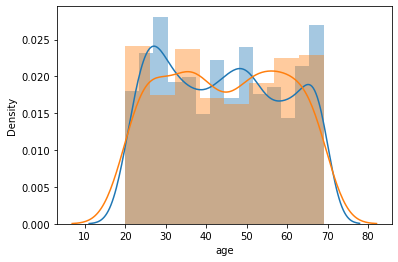

In [60]:
ax = sns.distplot(clients_with_ages_nonpr.age)  
ax = sns.distplot(clients_with_ages_pr.age)  #visualising

In [87]:
for_visual = logs.query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'success':'sum'})\
    .sort_values('success', ascending = False)\
    .groupby('success', as_index = False)\
    .agg({'client':'count'})\
    .rename(columns = {'success' : 'success_ops', 'client' : 'clients_num'})
     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


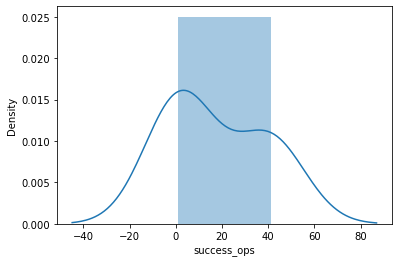

In [96]:
ax = sns.distplot(for_visual.success_ops)   #sns repeating